# =================================
# STARTING FROM THE BOTTOM
# =================================


1. OBTAIN DATA
2. SCRUB DATA
3. EXPLORE DATA
4. MODEL DATA
5. INTERPRET DATA


# MVP -- Minimum Viable Product:
(simpliest submission possible, no modeling)

In [0]:
import pandas as pd
import numpy as np
## GLOBAL WK 2
train_file = "https://raw.githubusercontent.com/danielcaraway/data/master/covid19-global-forecasting-week-2/train.csv"
test_file = "https://raw.githubusercontent.com/danielcaraway/data/master/covid19-global-forecasting-week-2/test.csv"
sub_file = "https://raw.githubusercontent.com/danielcaraway/data/master/covid19-global-forecasting-week-2/submission.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
sub = pd.read_csv(sub_file)

In [0]:
# BEFORE
sub.head()

In [4]:
# AFTER
sub['ConfirmedCases'] = 100
sub['Fatalities'] = 18
sub.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,100,18
1,2,100,18
2,3,100,18
3,4,100,18
4,5,100,18


In [0]:
sub.to_csv('submission', index=False)
from google.colab import files
files.download("submission.csv")

Ok so what's the problem with this picture? 
Well, we're saying that every single country on every single day has exactly 100 cases of COVID and exactly 18 deaths. BUT, we have proved we can manipulate the submission DF so we've got that going for us which is nice. 

Now, it would also be nice to actually take into account the country and the date, right? 

In [0]:
merged = pd.merge(sub, test, on="ForecastId", how="left")

In [9]:
df = merged.copy()
df

,ForecastId,ConfirmedCases,Fatalities,Province_State,Country_Region,Date
0,1,100,18,NaN,Afghanistan,2020-03-19
1,2,100,18,NaN,Afghanistan,2020-03-20
2,3,100,18,NaN,Afghanistan,2020-03-21
3,4,100,18,NaN,Afghanistan,2020-03-22
4,5,100,18,NaN,Afghanistan,2020-03-23
...,...,...,...,...,...,...
12637,12638,100,18,NaN,Zimbabwe,2020-04-26
12638,12639,100,18,NaN,Zimbabwe,2020-04-27
12639,12640,100,18,NaN,Zimbabwe,2020-04-28
12640,12641,100,18,NaN,Zimbabwe,2020-04-29


OK great! Now we have the country AND the date with our corecast ID!! So we know we can successfully merge our testing df into our submission df.

But... our ConfirmedCases and Fatalities are still 100 and 18 without regard to the country...

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df['days_from'] = df['Date'] - (df['Date'].min())
df['days_from'] = df['days_from'] / np.timedelta64(1, 'D')

In [15]:
df['CC_v2'] = df.apply(lambda x: x['days_from']*x['days_from'] , axis=1)
df['F_v2'] = df.apply(lambda x: x['days_from'] * 2 , axis=1)
df

,ForecastId,ConfirmedCases,Fatalities,Province_State,Country_Region,Date,days_from,CC_v2,F_v2
0,1,100,18,NaN,Afghanistan,2020-03-19,0.0,0.0,0.0
1,2,100,18,NaN,Afghanistan,2020-03-20,1.0,1.0,2.0
2,3,100,18,NaN,Afghanistan,2020-03-21,2.0,4.0,4.0
3,4,100,18,NaN,Afghanistan,2020-03-22,3.0,9.0,6.0
4,5,100,18,NaN,Afghanistan,2020-03-23,4.0,16.0,8.0
...,...,...,...,...,...,...,...,...,...
12637,12638,100,18,NaN,Zimbabwe,2020-04-26,38.0,1444.0,76.0
12638,12639,100,18,NaN,Zimbabwe,2020-04-27,39.0,1521.0,78.0
12639,12640,100,18,NaN,Zimbabwe,2020-04-28,40.0,1600.0,80.0
12640,12641,100,18,NaN,Zimbabwe,2020-04-29,41.0,1681.0,82.0


OK great! Now each country is different! I call this VAMPIRE DATA where the number of people bitten (infected) is logarathmic and the number of deaths is simply linear (because not everyone dies from bites, duh)

In [17]:
spain = df[df['Country_Region'] == 'Spain']
spain.head()

,ForecastId,ConfirmedCases,Fatalities,Province_State,Country_Region,Date,days_from,CC_v2,F_v2
8987,8988,100,18,NaN,Spain,2020-03-19,0.0,0.0,0.0
8988,8989,100,18,NaN,Spain,2020-03-20,1.0,1.0,2.0
8989,8990,100,18,NaN,Spain,2020-03-21,2.0,4.0,4.0
8990,8991,100,18,NaN,Spain,2020-03-22,3.0,9.0,6.0
8991,8992,100,18,NaN,Spain,2020-03-23,4.0,16.0,8.0


In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

graph_df = df[['days_from', 'CC_v2', 'F_v2']]

In [21]:
data = pd.melt(graph_df, id_vars=['days_from'], value_vars=['CC_v2','F_v2'])
data.head()

,days_from,variable,value
0,0.0,CC_v2,0.0
1,1.0,CC_v2,1.0
2,2.0,CC_v2,4.0
3,3.0,CC_v2,9.0
4,4.0,CC_v2,16.0


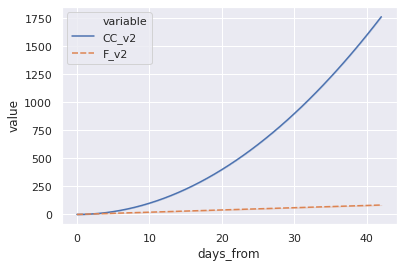

In [22]:
ax = sns.lineplot(x="days_from", y="value",
                  hue="variable", style="variable", data=data)

# =================================
# STARTING CONNOR FOR REAL
# =================================



# STEP 1: GET THAT DATA



In [0]:
import pandas as pd
import numpy as np
## GLOBAL WK 2
train_file = "https://raw.githubusercontent.com/danielcaraway/data/master/covid19-global-forecasting-week-2/train.csv"
test_file = "https://raw.githubusercontent.com/danielcaraway/data/master/covid19-global-forecasting-week-2/test.csv"
sub_file = "https://raw.githubusercontent.com/danielcaraway/data/master/covid19-global-forecasting-week-2/submission.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
sub = pd.read_csv(sub_file)

# STEP 2: PREP THAT DATA

* Deal with states + countries
* Deal with datetimes
* Deal with categoricals (LabelEncoder)


In [0]:
# subset = train.sample(n=500)

In [14]:
# subset

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
2152,3241,NaN,Burkina Faso,2020-03-02,0.0,0.0
15094,22847,California,US,2020-03-08,0.0,0.0
4248,6425,Inner Mongolia,China,2020-02-15,68.0,0.0
12675,19204,NaN,Qatar,2020-01-25,0.0,0.0
3696,5601,Guizhou,China,2020-01-22,1.0,0.0
...,...,...,...,...,...,...
15851,24012,Iowa,US,2020-02-02,0.0,0.0
18449,27936,NaN,Ukraine,2020-02-26,0.0,0.0
18746,28403,Gibraltar,United Kingdom,2020-01-24,0.0,0.0
6906,10443,NaN,Eswatini,2020-03-04,0.0,0.0


In [0]:
# train = subset.copy()
def use_country(state, country):
  if pd.isna(state):
    return country
  else:
    return state

train['Province_State'] = train.apply(lambda x: use_country(x['Province_State'], x['Country_Region']), axis=1)
test['Province_State'] = test.apply(lambda x: use_country(x['Province_State'], x['Country_Region']), axis=1)

In [0]:
train_d = pd.get_dummies(train)
test_d = pd.get_dummies(test)

In [47]:
train_dummies

,Id,ConfirmedCases,Fatalities,Province_State_Afghanistan,Province_State_Alabama,Province_State_Alaska,Province_State_Alberta,Province_State_Algeria,Province_State_Angola,Province_State_Anhui,Province_State_Antigua and Barbuda,Province_State_Argentina,Province_State_Arizona,Province_State_Armenia,Province_State_Australian Capital Territory,Province_State_Azerbaijan,Province_State_Bahamas,Province_State_Bangladesh,Province_State_Barbados,Province_State_Beijing,Province_State_Belarus,Province_State_Belize,Province_State_Bhutan,Province_State_Bosnia and Herzegovina,Province_State_Brazil,Province_State_British Columbia,Province_State_Brunei,Province_State_Bulgaria,Province_State_Burkina Faso,Province_State_Cabo Verde,Province_State_California,Province_State_Cambodia,Province_State_Cameroon,Province_State_Cayman Islands,Province_State_Chad,Province_State_Channel Islands,Province_State_Chile,Province_State_Colombia,Province_State_Colorado,Province_State_Congo (Brazzaville),...,Date_2020-02-17,Date_2020-02-18,Date_2020-02-19,Date_2020-02-20,Date_2020-02-21,Date_2020-02-22,Date_2020-02-23,Date_2020-02-24,Date_2020-02-25,Date_2020-02-26,Date_2020-02-27,Date_2020-02-28,Date_2020-02-29,Date_2020-03-01,Date_2020-03-02,Date_2020-03-03,Date_2020-03-04,Date_2020-03-05,Date_2020-03-06,Date_2020-03-07,Date_2020-03-08,Date_2020-03-09,Date_2020-03-10,Date_2020-03-11,Date_2020-03-12,Date_2020-03-13,Date_2020-03-14,Date_2020-03-15,Date_2020-03-16,Date_2020-03-17,Date_2020-03-18,Date_2020-03-19,Date_2020-03-20,Date_2020-03-21,Date_2020-03-22,Date_2020-03-23,Date_2020-03-24,Date_2020-03-25,Date_2020-03-26,Date_2020-03-27
2152,3241,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15094,22847,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4248,6425,68.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12675,19204,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3696,5601,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15851,24012,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18449,27936,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18746,28403,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6906,10443,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# STEP 3: MODEL THAT DATA
* GridSearchCV
* XGBRegressor

In [0]:
from sklearn.model_selection import GridSearchCV 
import time 
param_grid = {'n_estimators': [1000]}

def gridSearchCV(model, X_Train, y_Train, param_grid, cv=10, scoring='neg_mean_squared_error'): 
  start = time.time()

In [0]:
X_Train = train.copy()
y1_Train = X_Train['ConfirmedCases']
y2_Train = X_Train['Fatalities']

In [0]:
from xgboost import XGBRegressor

model = XGBRegressor()
model1 = gridSearchCV(model, X_Train, y1_Train, param_grid, 10, 'neg_mean_squared_error') 
model2 = gridSearchCV(model, X_Train, y2_Train, param_grid, 10, 'neg_mean_squared_error')

In [0]:
countries = set(X_Train['Country_Region'])

#models_C = {}
#models_F = {}

df_out = pd.DataFrame({'ForecastId': [], 'ConfirmedCases': [], 'Fatalities': []})

for country in countries:
    states = set(X_Train['Province_State'])
    # states = X_Train.loc[X_Train.Country == country, :].State.unique()
    #print(country, states)
    # check whether string is nan or not
    for state in states:
        X_Train_CS = X_Train.loc[(X_Train.Country == country) & (X_Train.State == state), ['State', 'Country', 'Date', 'ConfirmedCases', 'Fatalities']]
        
        y1_Train_CS = X_Train_CS.loc[:, 'ConfirmedCases']
        y2_Train_CS = X_Train_CS.loc[:, 'Fatalities']
        
        X_Train_CS = X_Train_CS.loc[:, ['State', 'Country', 'Date']]
        
        X_Train_CS.Country = le.fit_transform(X_Train_CS.Country)
        X_Train_CS['State'] = le.fit_transform(X_Train_CS['State'])
        
        X_Test_CS = X_Test.loc[(X_Test.Country == country) & (X_Test.State == state), ['State', 'Country', 'Date', 'ForecastId']]
        
        X_Test_CS_Id = X_Test_CS.loc[:, 'ForecastId']
        X_Test_CS = X_Test_CS.loc[:, ['State', 'Country', 'Date']]
        
        X_Test_CS.Country = le.fit_transform(X_Test_CS.Country)
        X_Test_CS['State'] = le.fit_transform(X_Test_CS['State'])
        
        #models_C[country] = gridSearchCV(model, X_Train_CS, y1_Train_CS, param_grid, 10, 'neg_mean_squared_error')
        #models_F[country] = gridSearchCV(model, X_Train_CS, y2_Train_CS, param_grid, 10, 'neg_mean_squared_error')
        
        model1 = XGBRegressor(n_estimators=1000)
        model1.fit(X_Train_CS, y1_Train_CS)
        y1_pred = model1.predict(X_Test_CS)
        
        model2 = XGBRegressor(n_estimators=1000)
        model2.fit(X_Train_CS, y2_Train_CS)
        y2_pred = model2.predict(X_Test_CS)
        
        df = pd.DataFrame({'ForecastId': X_Test_CS_Id, 'ConfirmedCases': y1_pred, 'Fatalities': y2_pred})
        df_out = pd.concat([df_out, df], axis=0)
    # Done for state loop
# Done for country Loop

# SIDEQUEST: More on XGBoost

In [0]:
b_train = train.copy()
b_test = test.copy()


### California Test

In [82]:
b_train['Date'].min()

Timestamp('2020-01-22 00:00:00')

In [0]:
b_train_ca = b_train[b_train['Province_State'] == 'California']
b_train = b_train_ca.copy()
b_train['Date'] = pd.to_datetime(b_train['Date'])



In [86]:
b_train['days_from'] = b_train['Date'] - (b_train['Date'].min())
b_train['days_from'] = b_train['days_from'] / np.timedelta64(1, 'D')
b_train

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,days_from
15048,22801,California,US,2020-01-22,0.0,0.0,0.0
15049,22802,California,US,2020-01-23,0.0,0.0,1.0
15050,22803,California,US,2020-01-24,0.0,0.0,2.0
15051,22804,California,US,2020-01-25,0.0,0.0,3.0
15052,22805,California,US,2020-01-26,0.0,0.0,4.0
...,...,...,...,...,...,...,...
15109,22862,California,US,2020-03-23,2108.0,39.0,61.0
15110,22863,California,US,2020-03-24,2538.0,50.0,62.0
15111,22864,California,US,2020-03-25,2998.0,65.0,63.0
15112,22865,California,US,2020-03-26,3899.0,81.0,64.0


In [88]:
b_train_y1 = b_train['ConfirmedCases']
b_train_y2 = b_train['Fatalities']
# b_train_X = b_train.drop(['ConfirmedCases','Fatalities'], axis=1)
b_train_X = b_train.drop(['Fatalities', 'Date'], axis=1)
b_train_X

,Id,Province_State,Country_Region,ConfirmedCases,days_from
15048,22801,California,US,0.0,0.0
15049,22802,California,US,0.0,1.0
15050,22803,California,US,0.0,2.0
15051,22804,California,US,0.0,3.0
15052,22805,California,US,0.0,4.0
...,...,...,...,...,...
15109,22862,California,US,2108.0,61.0
15110,22863,California,US,2538.0,62.0
15111,22864,California,US,2998.0,63.0
15112,22865,California,US,3899.0,64.0


In [0]:
## CA TEST
# b_train_X_ca = b_train_X[b_train_X['Province_State'] == 'California']
# b_train_X = b_train_X_ca.copy()

b_train_X_d = pd.get_dummies(b_train_X)

In [80]:
# b_train_X_d['']

,Id,Date,ConfirmedCases,Province_State_California,Country_Region_US
15048,22801,2020-01-22,0.0,1,1
15049,22802,2020-01-23,0.0,1,1
15050,22803,2020-01-24,0.0,1,1
15051,22804,2020-01-25,0.0,1,1
15052,22805,2020-01-26,0.0,1,1
...,...,...,...,...,...
15109,22862,2020-03-23,2108.0,1,1
15110,22863,2020-03-24,2538.0,1,1
15111,22864,2020-03-25,2998.0,1,1
15112,22865,2020-03-26,3899.0,1,1


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
[23:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:46]

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/x

K-fold CV average score: 0.72
MSE: 7067.87
RMSE: 84.07


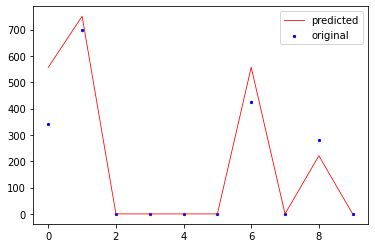

In [94]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import numpy as np
 
boston = load_boston()
# x, y = boston.data, boston.target

x,y = b_train_X_d, b_train_y1
# x,y = b_train_X_d, b_train_y2
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

xgbr = xgb.XGBRegressor()
print(xgbr)

xgbr.fit(xtrain, ytrain)
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


In [0]:
# BUILDING FORCAST ID:


In [29]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [31]:
boston.data.shape

(506, 13)

In [39]:
boston.target.shape

(506,)

#### BOSTON
* K-fold CV average score: 0.89
* MSE: 11.69
* RMSE: 3.42

#### V1
* K-fold CV average score: -107.07
* MSE: 36809.57
* RMSE: 191.86

#### V2 -- California
* K-fold CV average score: 0.61
* MSE: 139454.95
* RMSE: 373.44

#### V3 -- California, days_from, get_dummies

* K-fold CV average score: 0.93
* MSE: 9027.82
* RMSE: 95.01

ValueError: ignored

In [95]:
print(ypred)

[5.5687274e+02 7.5082043e+02 3.1586111e-02 3.1586111e-02 3.1586111e-02
 3.1586111e-02 5.5687274e+02 3.1586111e-02 2.2094861e+02 3.1586111e-02]


### SIDEQUEST TO MAKE SURE I CAN BUILD THE DF

In [96]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,Afghanistan,2020-01-26,0.0,0.0


In [103]:
test.head(50)

,ForecastId,Province_State,Country_Region,Date
0,1,Afghanistan,Afghanistan,2020-03-19
1,2,Afghanistan,Afghanistan,2020-03-20
2,3,Afghanistan,Afghanistan,2020-03-21
3,4,Afghanistan,Afghanistan,2020-03-22
4,5,Afghanistan,Afghanistan,2020-03-23
5,6,Afghanistan,Afghanistan,2020-03-24
6,7,Afghanistan,Afghanistan,2020-03-25
7,8,Afghanistan,Afghanistan,2020-03-26
8,9,Afghanistan,Afghanistan,2020-03-27
9,10,Afghanistan,Afghanistan,2020-03-28


In [99]:
sub.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [0]:
countries = set(train['Country_Region'])

In [0]:
states = set(train['Province_State'])

In [0]:
for country in countries:
  # train model
  # run model
  # make predictions
  # print predictions
  

In [0]:
from fbprophet import Prophet 


In [0]:
def get_prof_preds_for(df, n):
  m = Prophet(daily_seasonality=True)
  m.fit(df)
  future = m.make_future_dataframe(periods=n)
  forecast = m.predict(future)
  return forecast
  # fig1 = m.plot(forecast)

In [0]:
sm = train[['Date','ConfirmedCases']]
sm.columns = ['ds', 'y']

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


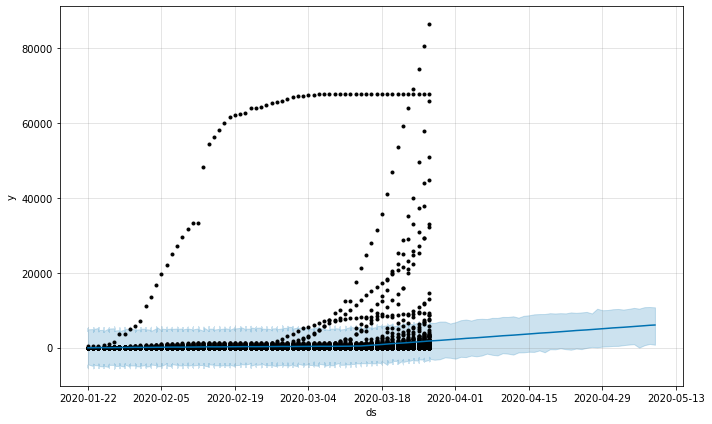

In [108]:
get_prof_preds_for(sm, 43)

In [124]:
big_df = pd.DataFrame()
for country in list(countries)[:3]:
  df = train[train['Country_Region'] == country]
  sm = df[['Date','ConfirmedCases']]
  sm.columns = ['ds', 'y']
  results = get_prof_preds_for(sm, 30)
  new_df = results[['ds', 'trend']]
  new_df['country'] = country
  big_df = big_df.append(new_df)
  print(results)
  # train model
  # run model
  # make predictions
  # print predictions

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


           ds      trend  ...  multiplicative_terms_upper       yhat
0  2020-01-22  -0.621744  ...                         0.0  -8.593858
1  2020-01-23  -0.092180  ...                         0.0  -8.094366
2  2020-01-24   0.437384  ...                         0.0  -8.094935
3  2020-01-25   0.966948  ...                         0.0 -10.171977
4  2020-01-26   1.496512  ...                         0.0 -10.172401
..        ...        ...  ...                         ...        ...
91 2020-04-22  47.687305  ...                         0.0  39.715190
92 2020-04-23  48.219114  ...                         0.0  40.216928
93 2020-04-24  48.750924  ...                         0.0  40.218604
94 2020-04-25  49.282734  ...                         0.0  38.143809
95 2020-04-26  49.814543  ...                         0.0  38.145630

[96 rows x 19 columns]


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


           ds      trend  ...  multiplicative_terms_upper       yhat
0  2020-01-22  -0.696099  ...                         0.0 -11.149811
1  2020-01-23  -0.105463  ...                         0.0  -8.853474
2  2020-01-24   0.485172  ...                         0.0  -6.557384
3  2020-01-25   1.075808  ...                         0.0 -11.796288
4  2020-01-26   1.666444  ...                         0.0 -11.688850
..        ...        ...  ...                         ...        ...
91 2020-04-22  53.388275  ...                         0.0  42.934563
92 2020-04-23  53.985234  ...                         0.0  45.237223
93 2020-04-24  54.582194  ...                         0.0  47.539637
94 2020-04-25  55.179153  ...                         0.0  42.307057
95 2020-04-26  55.776112  ...                         0.0  42.420818

[96 rows x 19 columns]
           ds      trend  ...  multiplicative_terms_upper       yhat
0  2020-01-22  -0.492852  ...                         0.0  -7.700532
1  2020-01

In [125]:
big_df

,ds,trend,country
0,2020-01-22,-0.621744,Liechtenstein
1,2020-01-23,-0.092180,Liechtenstein
2,2020-01-24,0.437384,Liechtenstein
3,2020-01-25,0.966948,Liechtenstein
4,2020-01-26,1.496512,Liechtenstein
...,...,...,...
91,2020-04-22,37.444629,Montenegro
92,2020-04-23,37.862464,Montenegro
93,2020-04-24,38.280298,Montenegro
94,2020-04-25,38.698133,Montenegro


In [122]:
df

,country,ConfirmedCases
0,Liechtenstein,0 -0.621744 1 -0.092180 2 0.43738...
1,Uzbekistan,0 -0.696099 1 -0.105463 2 0.48517...
2,Montenegro,0 -0.492852 1 -0.077356 2 0.33814...
